### 1. 벡터의 내적(Dot Product)

- 벡터 내적(Dot Product) 공식
- 두 벡터 𝑎와 𝑏가 있을 때, 벡터 내적은 다음과 같이 계산됩니다:
- 𝑎⋅𝑏=𝑎1⋅𝑏1+𝑎2⋅𝑏2+⋯+𝑎𝑛⋅𝑏𝑛
- 즉, 각 대응하는 원소들을 곱하고, 그 값을 모두 더한 결과가 내적입니다.

In [ ]:
# np.dot(a, b): NumPy에서 제공하는 dot 함수는 두 벡터 또는 행렬의 내적을 계산하는 함수입니다.
# 벡터 내적 결과는 두 벡터의 크기와 방향에 따라 하나의 숫자(스칼라)로 나타납니다.

In [2]:
import numpy as np

In [19]:
# 벡터 정의
a = np.array([1, 2])
b = np.array([3, 4])

In [28]:
# 내적 (Dot Product) : 결과 스칼라 -> dot
dot_ab = np.dot(a, b)
dot_ab

np.int64(11)

In [29]:
# 코사인 유사도 (방향 유사성)
cosine_similarity = dot_ab / (norm_a * norm_b)  # 각 벡터의 길이(L2 노름)의 곱
cosine_similarity   # θ: 두 벡터 사이 각도


np.float64(0.9838699100999074)

In [30]:
# 결과: 0.983...

# 코사인 유사도 범위
# 코사인 유사도는 −1 ~ 1 사이의 값을 가집니다.
# 0.983의 의미는?  cosine similarity = 0.983
# 해석 1에 매우 가까움-두 벡터의 방향이 거의 동일,  크기는 달라도 패턴이 거의 같음

#### 다차원 벡터 예시

In [31]:
# 만약 벡터가 더 큰 차원을 가진다면, 동일한 방식으로 내적을 계산할 수 있습니다.
# 예를 들어, 4차원 벡터에 대해서도 동일하게 작동합니다.

In [34]:
vector_c = np.array([1, 2, 3, 4])
vector_d = np.array([5, 6, 7, 8])

dot_product_cd = np.dot(vector_c, vector_d)
print(f"벡터 c와 d의 내적: {dot_product_cd}")

벡터 c와 d의 내적: 70


#### 내적 값이 0, 1, 2가 되는 벡터들을 시각화

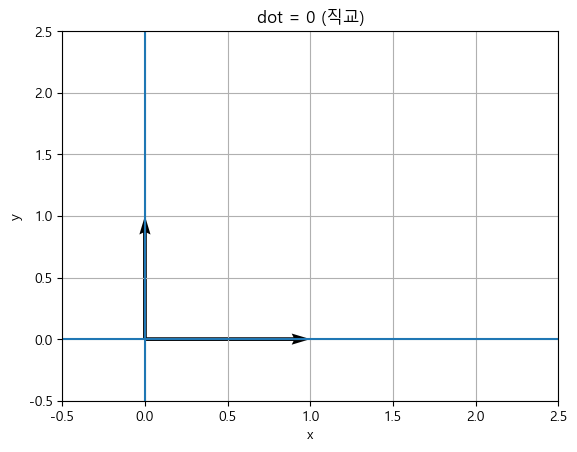

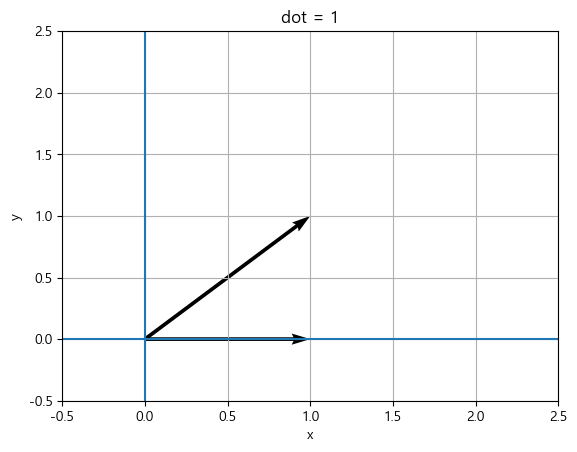

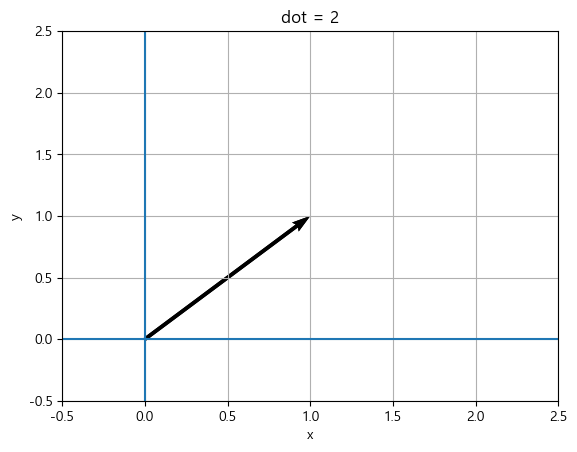

In [11]:
# 내적 값이 0, 1, 2가 되는 벡터들을 시각화
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family='Malgun Gothic')   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False

# 벡터 정의
vectors = [
    (np.array([1, 0]), np.array([0, 1]), "dot = 0 (직교)"),
    (np.array([1, 0]), np.array([1, 1]), "dot = 1"),
    (np.array([1, 1]), np.array([1, 1]), "dot = 2")
]

# 그래프 하나씩 그리기
for a, b, title in vectors:
    plt.figure()
    plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1)
    plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1)
    
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 2.5)
    plt.axhline(0)
    plt.axvline(0)
    plt.grid()
    
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.show()


In [ ]:
# 에니메이션으로 보기

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation  # Matplotlib 애니메이션 클래스를 불러옴, 여러 프레임을 순서대로 그려서 움직이는 그래프 생성
from IPython.display import HTML   # 주피터 노트북에서 HTML 콘텐츠를 출력하기 위한 도구

# 기준 벡터(고정): x축 방향의 단위 벡터, 길이 = 1, 방향 = 0°, ->비교의 기준이 되는 벡터
a = np.array([1.0, 0.0])

# b를 90° -> 0°로 회전 (내적 0 -> 1)
angles = np.linspace(np.pi/2, 0, 60)

fig, ax = plt.subplots()
ax.set_xlim(-1.2, 1.2)  # x, y 범위를 동일하게 설정, 벡터가 화면 밖으로 나가지 않도록 여유 확보
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box') # x축 1칸 = y축 1칸,원은 원처럼, 각도는 정확하게 보이게 함--> 벡터·각도 시각화에서 필수
ax.grid(True) # 좌표계 이해를 돕는 격자 표시
ax.axhline(0, linewidth=1) # x축, y축을 중앙에 표시,원점을 기준으로 벡터 방향 확인 가능
ax.axvline(0, linewidth=1)

# a, b 화살표(퀴버) 초기화
# 기준 벡터 a는 고정하고, 벡터 b를 회전시키면서 각도(θ)와 내적(dot product = cosθ)이 어떻게 변하는지를 애니메이션으로 보여주는 핵심 부

# 원점(0,0)에서 시작,기준 벡터 a를 화살표로 그림, 항상 고정
qa = ax.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1)
qb = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=1)

title = ax.set_title("")

def update(i):   # update(i) 함수: 90° → 0°로 감소
    theta = angles[i]
    b = np.array([np.cos(theta), np.sin(theta)])
    dot = float(np.dot(a, b))  # = cos(theta), 0->1

    qb.set_UVC(b[0], b[1])
    title.set_text(f"θ = {np.degrees(theta):.1f}°,  dot(a,b) = {dot:.2f}") # 제목 텍스트 갱신
    return qb, title

ani = FuncAnimation(fig, update, frames=len(angles), interval=80, blit=False)  # 애니메이션 실행

plt.close(fig)  # 불필요한 정지 그림 제거
HTML(ani.to_jshtml())  # 애니메이션을 HTML/JS 형태로 렌더링,노트북에서 바로 재생 가능


### 2. 행렬식(det: determinant)

- 행렬식(det)은 정사각행렬이 “얼마나 공간을 늘리거나 줄이는지”를 나타내는 값이다.

In [ ]:
# 행렬
# 𝐴=(■(𝑎&𝑏
#      𝑐&𝑑)
# 행렬식: det(A)=ad−bc

- 선형방정식 해 존재 여부
- 역행렬 존재 판단
- 선형변환의 크기·방향 판단
- 머신러닝(공분산행렬, 선형회귀) 기초

In [38]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

np.linalg.det(A)


np.float64(-2.0000000000000004)

#### 1. 2x2

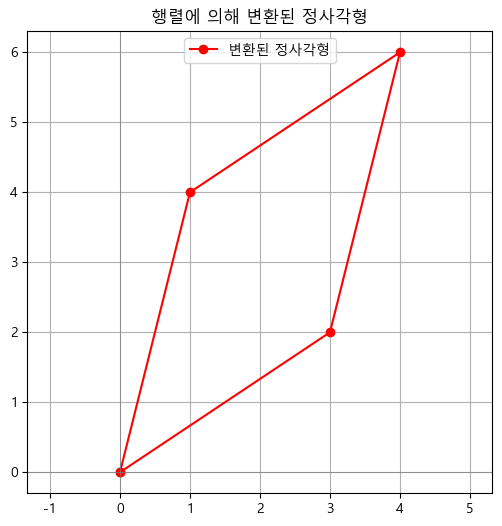

행렬:
[[3 1]
 [2 4]]

행렬식:
10.000000000000002


In [41]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family='Malgun Gothic')   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False


# 정의 : 2x2 행렬
matrix_2x2 = np.array([[3, 1],
                       [2, 4]])

# 행렬식 계산
determinant_2x2 = np.linalg.det(matrix_2x2)

# 원래의 단위 정사각형 정의
original_square = np.array([[0, 0],
                            [1, 0],
                            [1, 1],
                            [0, 1],
                            [0, 0]])  # 정사각형을 닫기 위해 시작점으로 복귀

# 행렬 변환을 정사각형에 적용
transformed_square = original_square @ matrix_2x2.T

# 변환된 정사각형만 시각화
plt.figure(figsize=(6, 6))

plt.plot(transformed_square[:, 0], transformed_square[:, 1], 'r-o', label="변환된 정사각형")
plt.title("행렬에 의해 변환된 정사각형")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.show()

# 행렬식 결과 출력
print("행렬:")
print(matrix_2x2)
print("\n행렬식:")
print(determinant_2x2)


#### 2. 3x3

In [42]:
import numpy as np

# 행렬 3x3 
matrix = np.array([[2, 3, 1],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬식 계산
determinant = np.linalg.det(matrix)


print("Matrix:")
print(matrix)
print("\nDeterminant:")
print(determinant)


Matrix:
[[2 3 1]
 [4 5 6]
 [7 8 9]]

Determinant:
9.000000000000005


###  3. 고유값(Eigenvalue)과 고유벡터(Eigenvector)

- 고유벡터는 변환 후에도 ‘방향이 변하지 않는 벡터’,
- 고유값은 그 벡터가 ‘얼마나 늘어나거나 줄어드는지’를 나타낸다.

- 수식으로 한 번만 보기
- 행렬 A에 대해
- 𝐴𝑣=𝜆𝑣
- 𝑣 → 고유벡터
- 𝜆 → 고유값
- 행렬 𝐴를 적용해도 방향은 그대로, 크기만 𝜆배

In [43]:
# np.linalg.eig(matrix) 함수는:
# 고유값 (𝜆)을 eigenvalues로 반환.
# 고유벡터 ( 𝑣)를 열벡터 형태로 eigenvectors로 반환.
# 각 고유벡터는 대응되는 고유값 방향에서 단위벡터로 정규화(normalized)되어 있습니다.

In [44]:
import numpy as np

# Define a matrix
matrix = np.array([[4, 1],
                   [2, 3]])

# Calculate eigenvalues and eigenvectors using numpy
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Display the results
print("Matrix:")
print(matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Matrix:
[[4 1]
 [2 3]]

Eigenvalues:
[5. 2.]

Eigenvectors:
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


#### 시각화 추가

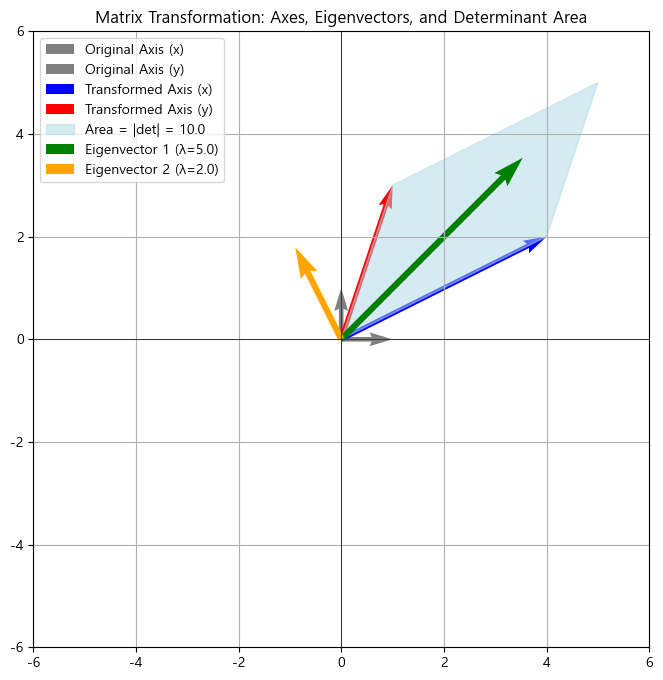

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
matrix_newer = np.array([[4, 1],
                         [2, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues_newer, eigenvectors_newer = np.linalg.eig(matrix_newer)

# Calculate the determinant of the matrix
determinant_newer = np.linalg.det(matrix_newer)

# Plot the original axes, transformed axes, eigenvectors, and determinant area
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the original coordinate axes
ax.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='gray', label='Original Axis (x)')
ax.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='gray', label='Original Axis (y)')

# Apply the transformation matrix to the original unit vectors
transformed_x = matrix_newer @ np.array([1, 0])
transformed_y = matrix_newer @ np.array([0, 1])

# Plot the transformed axes
ax.quiver(0, 0, transformed_x[0], transformed_x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Transformed Axis (x)')
ax.quiver(0, 0, transformed_y[0], transformed_y[1], angles='xy', scale_units='xy', scale=1, color='red', label='Transformed Axis (y)')

# Fill the parallelogram defined by the transformed unit square
parallelogram = np.array([[0, 0], transformed_x, transformed_x + transformed_y, transformed_y])
ax.fill(parallelogram[:, 0], parallelogram[:, 1], color='lightblue', alpha=0.5, label=f"Area = |det| = {determinant_newer:.1f}")

# Plot the eigenvectors scaled by eigenvalues for comparison
colors = ['green', 'orange']
for i in range(len(eigenvalues_newer)):
    eig_vector = eigenvectors_newer[:, i] * eigenvalues_newer[i]  # Scale eigenvector by eigenvalue
    ax.quiver(0, 0, eig_vector[0], eig_vector[1], angles='xy', scale_units='xy', scale=1,
              color=colors[i], label=f"Eigenvector {i+1} (λ={eigenvalues_newer[i]:.1f})", width=0.01)

# Set plot limits and labels
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Matrix Transformation: Axes, Eigenvectors, and Determinant Area")
plt.show()
